In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import precision_score, recall_score

In [2]:
# Loading the dataset
df = pd.read_csv(r'C:\Users\villain\OneDrive\Desktop\Data analytics\data mining\project ideas\bankCusChurn.csv')
df


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
print("-----------Information-----------")
print(df.info())


-----------Information-----------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


In [4]:
numerical = [var for var in df.columns if df[var].dtype!='O'] 
categorical = [var for var in df.columns if df[var].dtype == 'O']
print("Numerical: ", numerical)
print("Caregorical: ", categorical)

Numerical:  ['RowNumber', 'CustomerId', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']
Caregorical:  ['Surname', 'Geography', 'Gender']


In [5]:
df.select_dtypes(include='object').head() # looking at all the categorical datas present in the dataset

,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female


In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# data cleaning and preprocessing

In [7]:
print("----------Missing value-----------")
print(df.isna().sum())
print("----------Null value-----------")
print(df.isnull().sum())

----------Missing value-----------
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64
----------Null value-----------
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


In [8]:
print(df.nunique())

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64


In [9]:
# Creating a LabelEncoder objects
print(f'Geography unique',df.Geography.unique())
le = LabelEncoder()
le.fit(df.Geography)
# Transforming the categories into numerical values
df['Geography_encoded'] = le.transform(df['Geography'])

df



Geography unique ['France' 'Spain' 'Germany']


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_encoded
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,2
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1


In [10]:
print(f'Gender unique', df.Gender.unique()) 
le = LabelEncoder()

le.fit(df.Gender)
df['Gender_encoded'] = le.transform(df['Gender'])
df

Gender unique ['Female' 'Male']


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_encoded,Gender_encoded
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0,0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,2,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,0,0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0,0
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,1


In [11]:
#dropping these columns as they are not required
df.drop(columns=['RowNumber', 'CustomerId', 'Surname','Geography','Gender'], inplace=True)#dropping as they are not required
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_encoded,Gender_encoded
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.746300,0.545700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.827529,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,2.000000,1.000000


In [12]:
#dropping any duplicates value if they are present in the dataset
df.drop_duplicates(inplace=True)
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_encoded,Gender_encoded
0,619,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,2,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,1


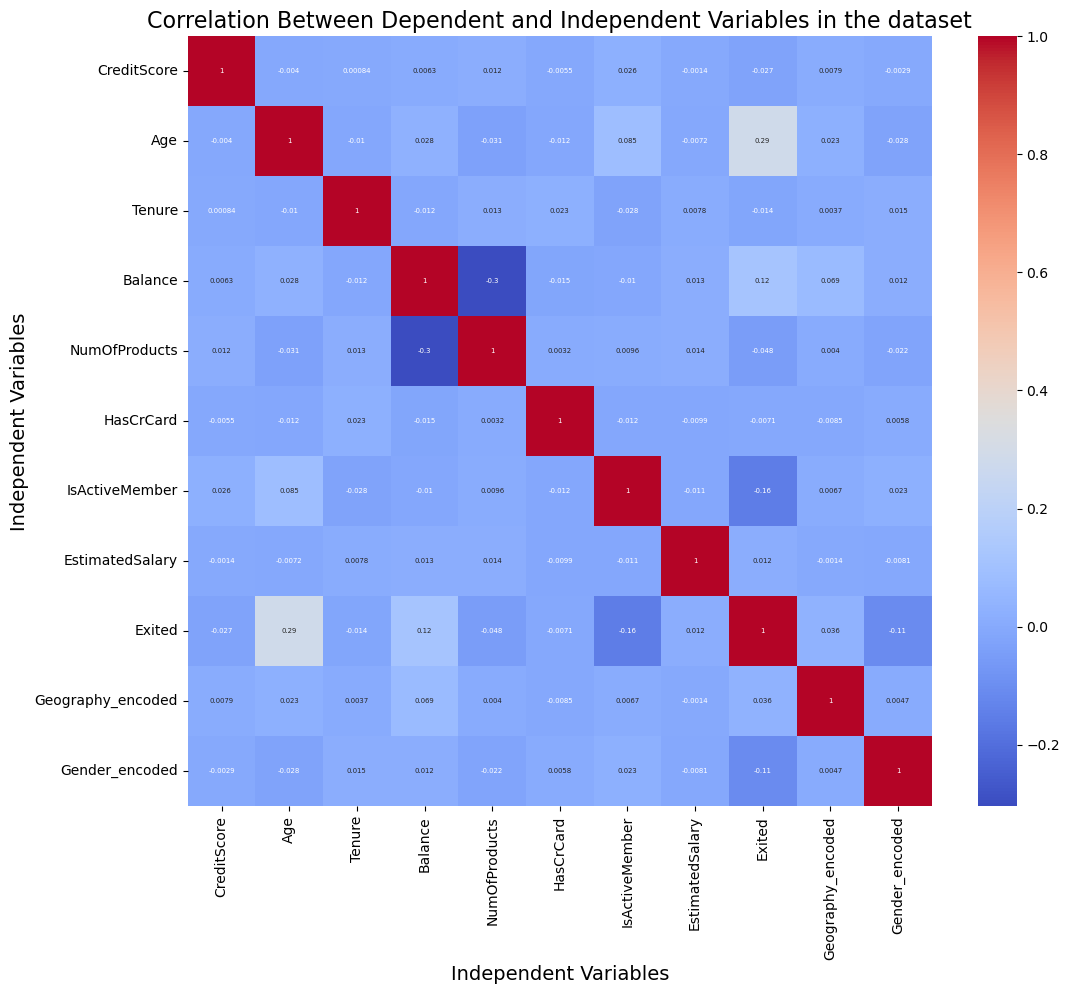

In [13]:
# Computing the correlation matrix
corr = df.corr()

# Setting the figure size
plt.figure(figsize=(12, 10))

# Creating the correlation graph
sns.heatmap(corr, cmap='coolwarm', annot=True, annot_kws={"size": 5})

# Adding axis labels and title
plt.xlabel('Independent Variables', fontsize=14)
plt.ylabel('Independent Variables', fontsize=14)
plt.title('Correlation Between Dependent and Independent Variables in the dataset', fontsize=16)

# Showing the plot
plt.show()

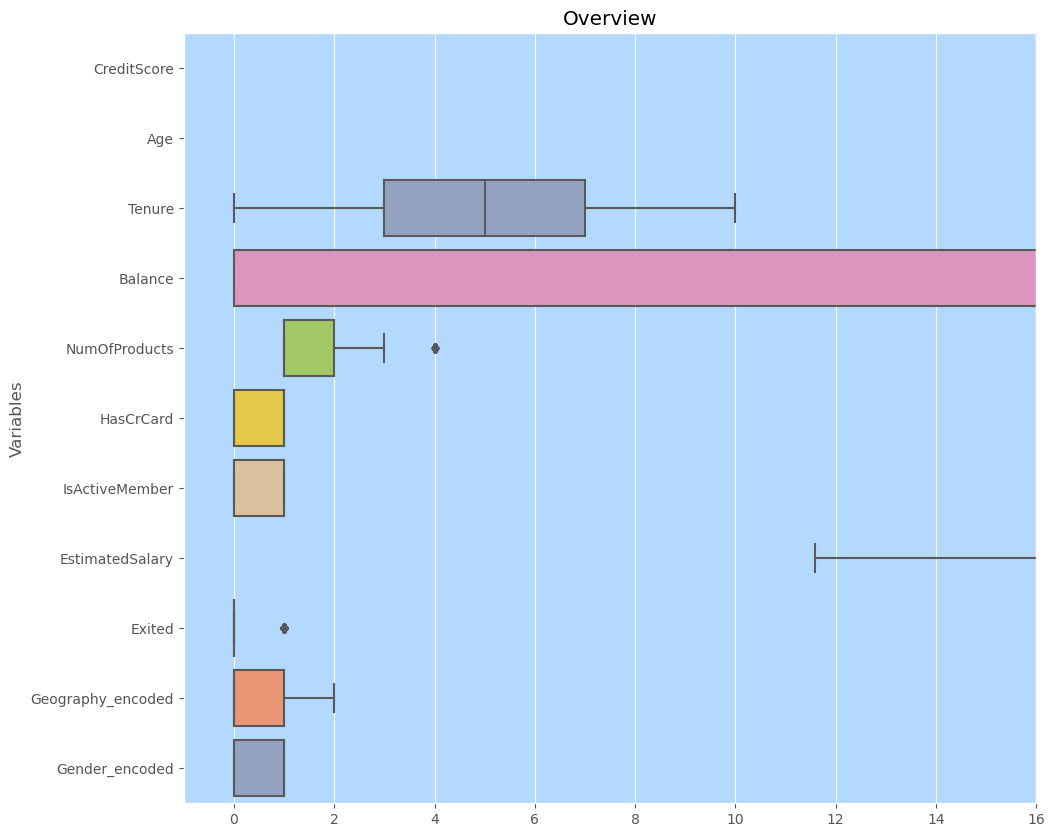

In [14]:
#creating box plot for looking at outliers
plt.style.use('ggplot') # using ggplot style

f, ax = plt.subplots(figsize=(11, 10))

ax.set_facecolor('#b3d9ff')
ax.set(xlim=(-1, len(df.columns)+5))
plt.ylabel('Variables')
plt.title("Overview")
ax = sns.boxplot(data = df, # creating a box plot
  orient = 'h', 
  palette = 'Set2',)

In [15]:
df.dtypes

CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_encoded      int32
Gender_encoded         int32
dtype: object

In [16]:
# copying the final data into a csv file for furthur use
# create a sample DataFrame
DF = pd.DataFrame(df)

# save DataFrame to CSV file
DF.to_csv('bankchurnmodel.csv', index=False)


In [17]:
dff = pd.read_csv(r'C:\\Users\\villain\\OneDrive\\Desktop\\Data analytics\\data mining\\bankchurnmodel.csv')
dff

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_encoded,Gender_encoded
0,619,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,2,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,1


In [18]:
true_value=dff['Exited'].sum()
false_value= len(dff['Exited'])-true_value
print(true_value, false_value)

2037 7963


In [19]:
print(dff.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_encoded  10000 non-null  int64  
 10  Gender_encoded     10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB
None


In [20]:
dff.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_encoded,Gender_encoded
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700,0.746300,0.545700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769,0.827529,0.497932
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,1.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,1.000000,1.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,2.000000,1.000000


In [21]:
#from SKLEARN library
# Splitting the dataset into training and testing sets
X = df.drop('Exited', axis=1)
y = df['Exited']
#standardizing the independent variable values
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train.sum())
print(y_test.sum())

(7000, 10)
(3000, 10)
(7000,)
(3000,)
1453
584


In [23]:
# Creating the Random Forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42, max_features='sqrt')

# Fitting the classifier to the training data
rfc.fit(X_train, y_train)

# Predicting on the testing data
y_pred = rfc.predict(X_test)

# Evaluating the model's performance
accuracy_rm = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy_rm)


f1 = f1_score(y_test, y_pred )
# print the F1 score
print("F1 score:", f1)
precision = precision_score(y_test, y_pred)
print("precision: ", precision)
recall = recall_score(y_test, y_pred)
print("recall: ", recall)

Accuracy: 0.866
F1 score: 0.5686695278969957
precision:  0.7614942528735632
recall:  0.4537671232876712


In [24]:
# create a sample DataFrame
bankcus_RF = pd.DataFrame(y_pred,columns=['bankCusChurn_RFPredictions'])

# save DataFrame to CSV file
bankcus_RF.to_csv('bankCusChurn_RFPredictions.csv', index=False)

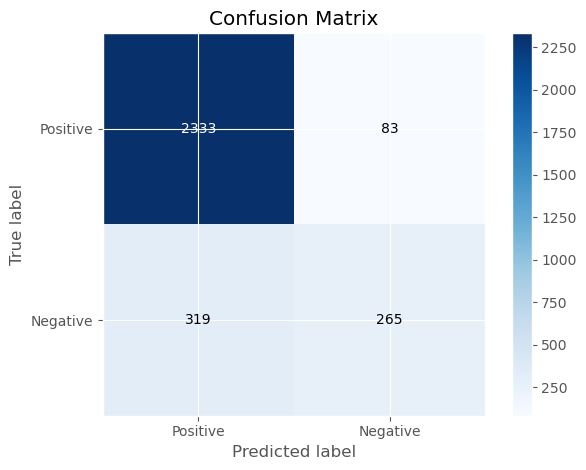

In [25]:
#Printing Confusion Matrix
import numpy as np
class_names = ['Positive', 'Negative']
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Loop over data dimensions
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j]),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()

In [26]:
np.random.seed(123)
param_grid = {'n_neighbors': range(1, 21)}
# Creating the k-NN classifier and perform grid search
knn_model = KNeighborsClassifier()
grid_search = GridSearchCV(knn_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Getting the best model from the grid search
best_knn_model = grid_search.best_estimator_

# Making predictions on the test set
y_predKNN = best_knn_model.predict(X_test)

# Compute the accuracy of the model
accuracy = accuracy_score(y_test, y_predKNN)
print("Accuracy: {:.2f}%".format(accuracy * 100))
f1 = f1_score(y_test, y_predKNN)
# print the F1 score
print("F1 score:", f1)
precision = precision_score(y_test, y_predKNN)
print("precision: ", precision)
recall = recall_score(y_test, y_predKNN)
print("recall: ", recall)




Accuracy: 84.40%
F1 score: 0.4532710280373832
precision:  0.7132352941176471
recall:  0.3321917808219178


In [27]:
#storing the results in a csv file
# create a sample DataFrame
bankcus_KNN = pd.DataFrame(y_predKNN,columns=['bankCusChurn_KNNPredictions'])

# save DataFrame to CSV file
bankcus_KNN.to_csv('bankCusChurn_KNNPredictions.csv', index=False)

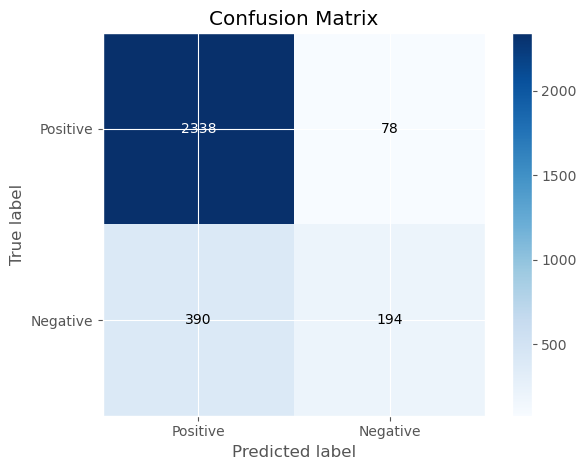

In [28]:
#Printing Confusion Matrix
import numpy as np
class_names = ['Positive', 'Negative']
cm = confusion_matrix(y_test, y_predKNN)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=class_names, yticklabels=class_names,
       title='Confusion Matrix',
       ylabel='True label',
       xlabel='Predicted label')

# Loop over data dimensions and create text annotations.
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j]),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.tight_layout()
plt.show()